In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


import warnings
warnings.filterwarnings('ignore')

In [10]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (2).csv


In [19]:
toyota=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyota


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [ ]:
toyota = toyota[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [21]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [22]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
toyota['Doors'].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [24]:
toyota = toyota.rename({'Price':'price', 'Age_08_04':'age', 'KM':'km', 'HP':'hp', 'Doors':'doors',
                        'Gears':'gears', 'Quarterly_Tax':'qt', 'Weight':'weight'}, axis=1)
toyota.columns

Index(['Id', 'Model', 'price', 'age', 'Mfg_Month', 'Mfg_Year', 'km',
       'Fuel_Type', 'hp', 'Met_Color', 'Color', 'Automatic', 'cc', 'doors',
       'Cylinders', 'gears', 'qt', 'weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [25]:
toyota[toyota.duplicated()]

,Id,Model,price,age,Mfg_Month,Mfg_Year,km,Fuel_Type,hp,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [26]:
toyota.shape

(1436, 38)

In [27]:
toyota = toyota.drop_duplicates()
toyota.shape

(1436, 38)

In [29]:
#Collinearity Problem Check
# Calculate VIF
rsq_age=smf.ols('age~km+hp+cc+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('km~age+hp+cc+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('hp~age+km+cc+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~age+km+hp+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('doors~age+km+hp+cc+gears+qt+weight',data=toyota).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('gears~age+km+hp+cc+doors+qt+weight',data=toyota).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('qt~age+km+hp+cc+doors+gears+weight',data=toyota).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('weight~age+km+hp+cc+doors+gears+qt',data=toyota).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


Sice vif<20, for all variables, No collinearity found among independent variables

In [28]:
#sns.set_style(style='darkgrid')
#sns.pairplot(toyota_2)

In [30]:
import statsmodels.formula.api as smf 
model = smf.ols('price~age+km+hp+doors+gears+weight+cc+qt',data=toyota).fit()

In [31]:
model.params 

Intercept   -5573.106358
age          -121.658402
km             -0.020817
hp             31.680906
doors          -1.616641
gears         594.319936
weight         16.958632
cc             -0.121100
qt              3.949081
dtype: float64

In [32]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.948666
age         -46.511852
km          -16.621622
hp           11.241018
doors        -0.040410
gears         3.016007
weight       15.879803
cc           -1.344222
qt            3.014535
dtype: float64 
 Intercept     8.241949e-05
age          3.354724e-288
km            7.538439e-57
hp            3.757218e-28
doors         9.677716e-01
gears         2.606549e-03
weight        2.048576e-52
cc            1.790902e-01
qt            2.619148e-03
dtype: float64


In [33]:
print('R2 =',model.rsquared*100, '\n'
      'R2 Adj. = ',model.rsquared_adj*100)

R2 = 86.37627463428193 
R2 Adj. =  86.29989775766963


In [34]:
# Model Deleting Diagnostics (detecting outliers and influencer)
#Cook's Distance

from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

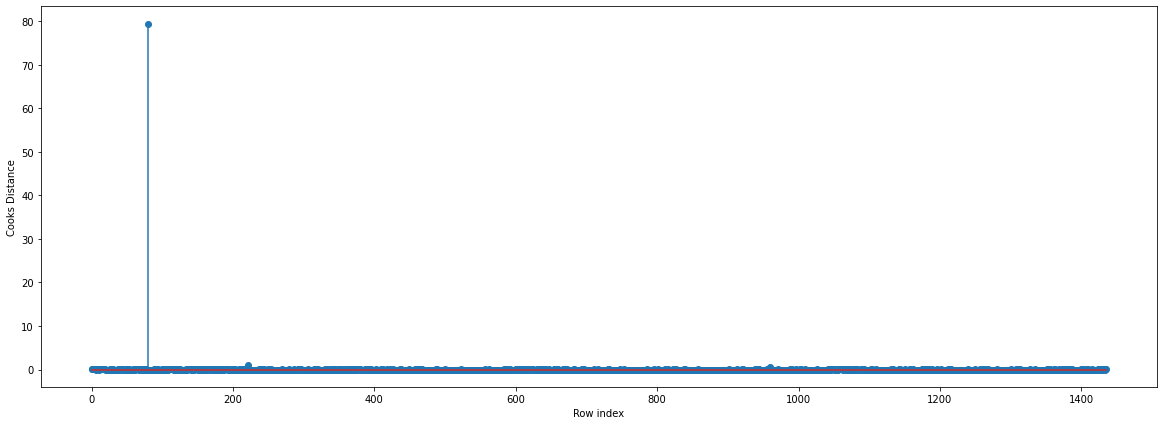

In [35]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

In [37]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.08147632311977715

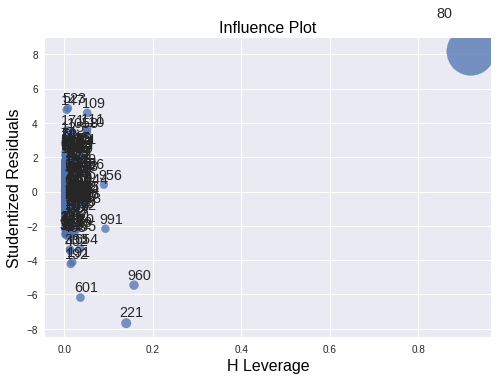

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
plt.style.use('seaborn')

influence_plot(model,alhpa=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [39]:
# From the above plot, it is evident that data point 80 is the influencer
toyota[toyota.index.isin([80])]

,Id,Model,price,age,Mfg_Month,Mfg_Year,km,Fuel_Type,hp,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [40]:
toyota.shape

(1436, 38)

In [41]:
#Discard the data points which are influencers and re-asign the row number (reset_index())
toyota_1=toyota.drop(toyota.index[[80]],axis=0).reset_index()
toyota_1.shape

(1435, 39)

In [42]:
toyota_1.columns

Index(['index', 'Id', 'Model', 'price', 'age', 'Mfg_Month', 'Mfg_Year', 'km',
       'Fuel_Type', 'hp', 'Met_Color', 'Color', 'Automatic', 'cc', 'doors',
       'Cylinders', 'gears', 'qt', 'weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [43]:
#Drop the original index
toyota_1=toyota_1.drop(['index'],axis=1)
toyota_1.shape

(1435, 38)

In [44]:
#Building the Model again

model_1= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_1).fit()
print('R2 =',model_1.rsquared*100, '\n'
      'R2 Adj. = ',model_1.rsquared_adj*100)

R2 = 86.93790488655817 
R2 Adj. =  86.86462525057813


In [45]:
#Cook's Distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence_1 = model_1.get_influence()
(c, _) = model_influence_1.cooks_distance

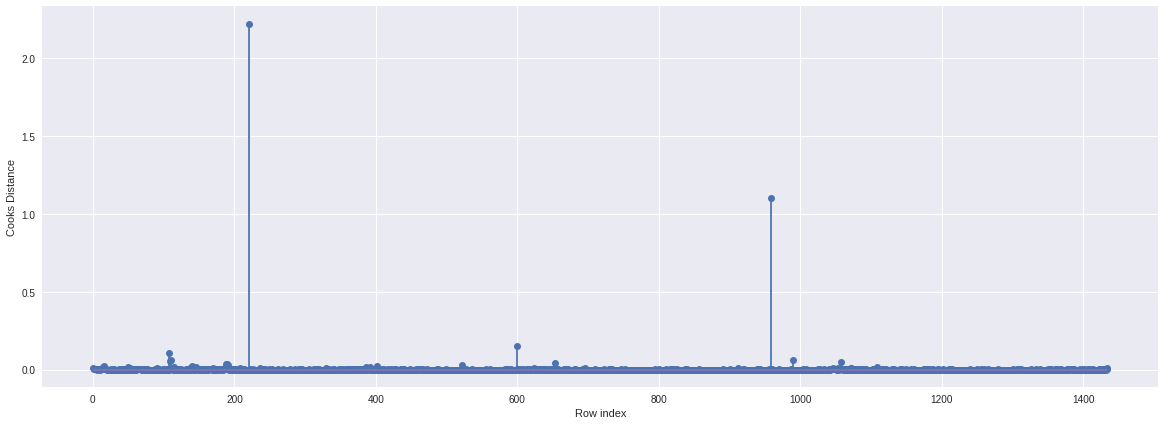

In [46]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(220, 2.224461171300675)

In [ ]:
k = toyota_1.shape[1]
n = toyota_1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

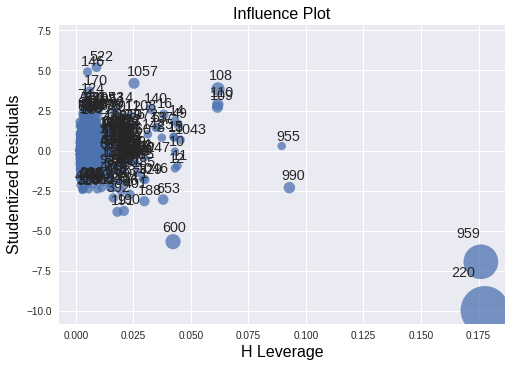

In [49]:
plt.style.use('seaborn')
influence_plot(model_1,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [50]:
toyota_1[toyota_1.index.isin([219,958])]

,Id,Model,price,age,Mfg_Month,Mfg_Year,km,Fuel_Type,hp,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
219,222,TOYOTA Corolla 1.6 Terra LB 4/5-Doors,11950,43,2,2001,74285,Petrol,110,1,...,0,0,1,1,0,0,0,0,1,1
958,963,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,8895,61,8,1999,50925,Petrol,110,1,...,0,0,1,1,0,0,1,0,1,1


In [ ]:
#Discard the data points which are influencers and re-asign the row number (reset_index())
toyota_2=toyota_1.drop(toyota_1.index[[219,958]],axis=0).reset_index()
toyota_2.shape

In [52]:
#Drop the original index
toyota_2=toyota_2.drop(['index'],axis=1)
toyota_2.columns

Index(['Id', 'Model', 'price', 'age', 'Mfg_Month', 'Mfg_Year', 'km',
       'Fuel_Type', 'hp', 'Met_Color', 'Color', 'Automatic', 'cc', 'doors',
       'Cylinders', 'gears', 'qt', 'weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [53]:
model_2= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_2).fit()
print('R2 =',model_2.rsquared*100, '\n'
      'R2 Adj. = ',model_2.rsquared_adj*100)

R2 = 86.95085645602897 
R2 Adj. =  86.87754666083812


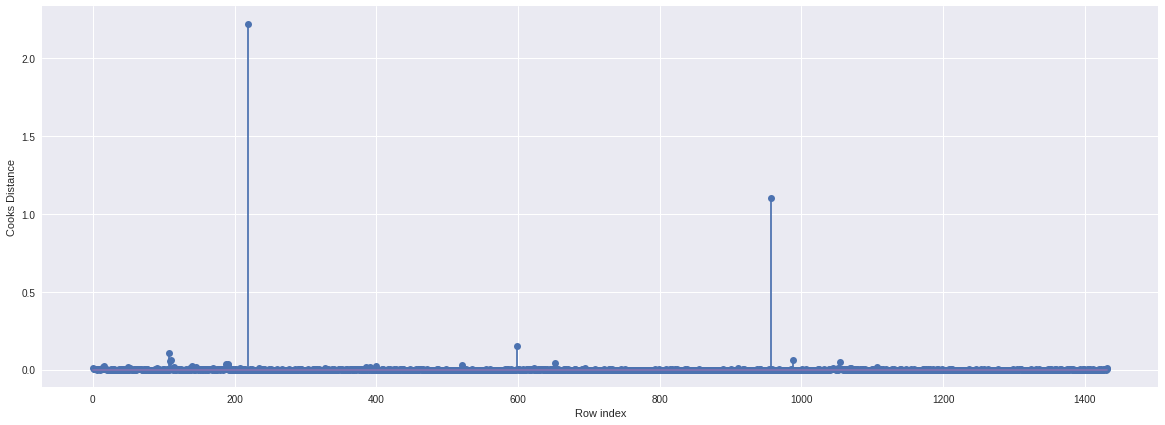

In [54]:
#Cooks Distance
model_influence_2 = model_2.get_influence()
(c, _) = model_influence_2.cooks_distance
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(219, 2.2215501122131727)

In [56]:
k = toyota_2.shape[1]
n = toyota_2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.08164689462665736

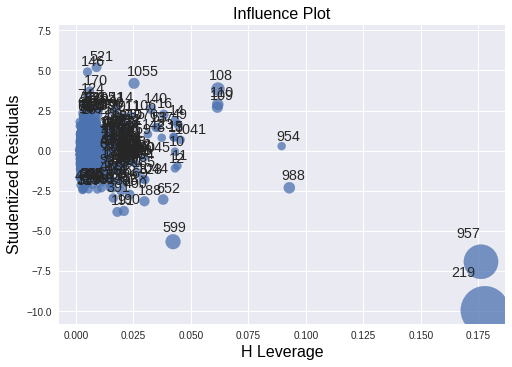

In [57]:
plt.style.use('seaborn')
influence_plot(model_2,alhpa=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [58]:
toyota_2[toyota_2.index.isin([598])]

,Id,Model,price,age,Mfg_Month,Mfg_Year,km,Fuel_Type,hp,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
598,604,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA AUT4...,11250,47,10,2000,5309,Petrol,110,1,...,0,0,1,0,0,0,1,0,0,1


In [59]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota_3=toyota_2.drop(toyota_2.index[[598]],axis=0).reset_index()
toyota_3.shape

(1432, 39)

In [60]:
#Drop the original index
toyota_3=toyota_3.drop(['index'],axis=1)
toyota_3.columns

Index(['Id', 'Model', 'price', 'age', 'Mfg_Month', 'Mfg_Year', 'km',
       'Fuel_Type', 'hp', 'Met_Color', 'Color', 'Automatic', 'cc', 'doors',
       'Cylinders', 'gears', 'qt', 'weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [61]:
model_3= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_3).fit()
print('R2 =',model_3.rsquared*100, '\n'
      'R2 Adj. = ',model_3.rsquared_adj*100)

R2 = 86.96962417223179 
R2 Adj. =  86.89636836996746


In [62]:
df1 = toyota_3.pop('price')
toyota_3['price']=df1
toyota_3.columns

Index(['Id', 'Model', 'age', 'Mfg_Month', 'Mfg_Year', 'km', 'Fuel_Type', 'hp',
       'Met_Color', 'Color', 'Automatic', 'cc', 'doors', 'Cylinders', 'gears',
       'qt', 'weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period',
       'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
       'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows',
       'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
       'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar',
       'price'],
      dtype='object')

In [63]:
#Final Model
model_3= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_3).fit()
print('R2 =',model_3.rsquared*100, '\n'
      'R2 Adj. = ',model_3.rsquared_adj*100)

R2 = 86.96962417223179 
R2 Adj. =  86.89636836996746


In [64]:
#Predecting the new data
#New data for prediction
new_data=pd.DataFrame({'age': 23,"hp":90,'km':40000, "doors":5,"gears":5, 'weight':1200, 'cc':1600,'qt':70}, index=[1])

In [65]:
pred_y = model_3.predict(new_data)
pred_y

1    17046.813092
dtype: float64

In [66]:
# Automatic Prediction of Price
pred_y=model_3.predict(toyota)
pred_y

0       16536.588373
1       16070.496896
2       16510.946862
3       16157.227925
4       15946.957854
            ...     
1431     8977.124889
1432     8442.433008
1433     8598.449381
1434     8720.628278
1435     9979.450798
Length: 1436, dtype: float64